In [1]:
import tables

f = tables.open_file("/mnt/e/Documents/packlab-hf/exporteddesigns/slu020.mat")
stim = f.get_node('/stim_hf')[:]
stimidx = f.get_node('/stimidx_hf')[:]
stim = f.get_node('/stim_hf')[:]
f.close()

f = tables.open_file("/mnt/e/data_derived/packlab-mst/ku254.mat")
stim_mst = f.get_node('/stim_hf')[:]
stimidx_mst = f.get_node('/stimidx_hf')[:]
f.close()

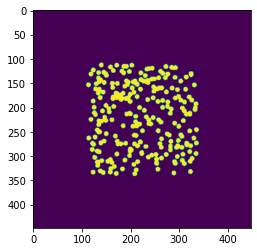

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import disk

disk_sz = 5
star_pos = np.random.rand(1000, 2) * 112 *4
sz = 112*4


mask = np.zeros((sz, sz))
mask[112:112*3, 112:112*3] = True

In [25]:
%%timeit
img = np.zeros((sz, sz), dtype=np.uint8)
for x_, y_ in zip(star_pos[:, 0], star_pos[:, 1]):
    if x_ < 0 or y_ < 0 or x_ >= sz or y_ >= sz:
        continue

    if mask[int(y_), int(x_)]:
        rr, cc = disk((y_, x_), disk_sz, shape=img.shape)
        img[rr, cc] = 255

im0 = img

22.7 ms ± 168 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
%%timeit
img = np.zeros((sz, sz), dtype=np.uint8)
rr, cc = disk((img.shape[0] // 2, img.shape[1] // 2), disk_sz, shape=img.shape)
rr = rr - img.shape[0] // 2
cc = cc - img.shape[1] // 2

dotr = (star_pos[:, 1].reshape((-1, 1)) + rr.reshape((1, -1))).ravel()
dotc = (star_pos[:, 0].reshape((-1, 1)) + cc.reshape((1, -1))).ravel()

validx = (dotr >= 0) & (dotr < img.shape[0]) & (dotc >= 0) & (dotc < img.shape[1])

dotr = dotr[validx].astype(np.int)
dotc = dotc[validx].astype(np.int)

img = np.zeros((sz, sz), dtype=np.uint8)
img[dotr, dotc] = 255
img = img * mask

1.12 ms ± 1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:

rr, cc = disk((disk_sz[0] // 2, disk_sz[1] // 2), disk_sz, shape=img.shape)
rr = rr - disk_sz[0] // 2
cc = cc - disk_sz[0] // 2

dotr = (star_pos[:, 1].reshape((-1, 1)) + rr.reshape((1, -1))).ravel()
dotc = (star_pos[:, 0].reshape((-1, 1)) + cc.reshape((1, -1))).ravel()

dotr = dotr[(dotr >= 0) & (dotr < disk_sz[0])].astype(np.int)
dotc = dotc[(dotc >= 0) & (dotc < disk_sz[0])].astype(np.int)

img = np.zeros((sz, sz), dtype=np.uint8)
img[dotr, dotc] = 255
""""""

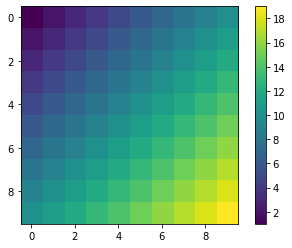

In [15]:
import matplotlib.pyplot as plt
plt.imshow(stimidx_mst[:, :10].T)
plt.colorbar()

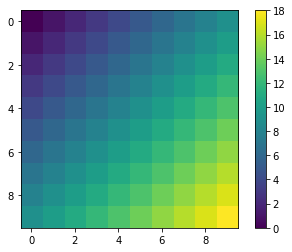

In [16]:
import matplotlib.pyplot as plt
plt.imshow(stimidx[:, :10].T)
plt.colorbar()

In [108]:
f.close()

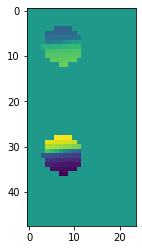

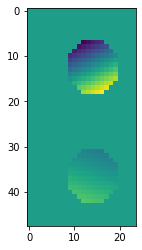

In [68]:
import matplotlib.pyplot as plt
idx = 5000

plt.imshow(stim[:, idx].reshape((24*2, 24)))
plt.show()

import matplotlib.pyplot as plt
plt.imshow(stim_mst[:, idx].reshape((24*2, 24)))
plt.show()

In [17]:
import napari

f = tables.open_file("/mnt/e/data_derived/packlab-dorsal/slu020.h5")
#f.close()
data = f.get_node('/X_traintune')[:]
f.close()

#for i in range(1000):
#    out_file = "/mnt/e/anim/{data}.png"
#    data[i, :, :].squeeze()
import napari
viewer = napari.Viewer()
viewer.add_image(data, name='data', colormap='Greys_r')

<Image layer 'data' at 0x7ffa70c42d90>

In [24]:
f = tables.open_file("/mnt/e/data_derived/packlab-dorsal/slu020.h5")
#f.close()
X = f.get_node('/X_traintune')[:]
Xidx = f.get_node('/Xidx_traintune')[:]
Y = f.get_node('/X_traintune')[:]
f.close()

In [30]:
Xidx[:10, :]

array([[-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.],
       [ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.],
       [ 5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.],
       [ 6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.],
       [ 7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16.],
       [ 8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.]])

In [4]:
import tables
f = tables.open_file("/mnt/e/data_derived/crcns-mt1/movies/cell01.h5")
#f.close()
X = f.get_node('/X_traintune')[:]
Xidx = f.get_node('/Xidx_traintune')[:]
Y = f.get_node('/X_traintune')[:]
f.close()

In [5]:
plt.imshow(abs(X).sum(0))
plt.colorbar()

NameError: name 'plt' is not defined

In [6]:
import napari
viewer = napari.Viewer()
viewer.add_image(X, name='data', colormap='Greys_r')

<Image layer 'data' at 0x7f66b95ae8e0>